#Importo librerie necessarie


Installiamo ed importiamo le librerie necessarie. Importiamo la libreria warnings per avvisarci di eventuali anomalie.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from pylab import *   
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
#%matplotlib inline per includere i grafici con il codice 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Caricamento dati e prima analisi esplorativa

Carichiamo i dati .csv tramite pandas.
Utilizziamo alcune funzioni per capire i dati a disposizione.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/glassdoor_jobs.csv")

In [ ]:
data.head(5) #Prime 5 osservazioni

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [ ]:
data.tail(5) #Ultime 5 osservazioni

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom
955,955,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n3.6,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),-1


In [ ]:
data.shape #Dimensionalità dataset

(956, 15)

In [ ]:
data.columns #Colonne dataset

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [ ]:
data.info() #Abbiamo tutti i 956 valori per colonna non nulli.
            #I parametri: Unnamed, Rating, Founded sono gli unici dati numerici.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [ ]:
data.describe() #Una panoramica dei valori numerici. Notiamo dei valori anomali per la categoria 'min'

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


#Pulizia dati

Per prima cosa rinominiamo il nome delle colonne.

In [ ]:
data.columns = ["N","Titolo lavorativo","Salario stimato","Descrizione lavoro","Punteggio","Compagnia","Luogo",
                "Sede","Dimensioni","Anno fondazione","Tipo di azienda","Industria","Settore","Fatturato","Concorrenti"]
data.index.name = "Numero osservazione"
data.pop("N")

Numero osservazione
0        0
1        1
2        2
3        3
4        4
      ... 
951    951
952    952
953    953
954    954
955    955
Name: N, Length: 956, dtype: int64

Sia nella colonna "Punteggio" che in quella "Anno fondazione" abbiamo il valore anomalo -1 come abbiamo potuto notare durante l'esplorazione dei dati.
Per risolvere questo problema andiamo a sostituire il valore -1 con la media della distribuzione per entrambe le colonne.



In [ ]:
data['Punteggio'] = data['Punteggio'].apply(lambda x: np.NaN if x == -1 else x) #Alla colonna punteggio applichiamo una funzione che sostituisce il valore -1 con NaN.
data['Punteggio'] = data['Punteggio'].fillna(data['Punteggio'].mean()) #Riempiamo i valori NaN con la media dei punteggi.

data['Anno fondazione'] = data['Anno fondazione'].apply(lambda x: np.NaN if x== -1 else x) #Ripetiamo la stessa procedura applicata a 'Punteggio'.
data['Anno fondazione'] = data['Anno fondazione'].fillna(int(data['Anno fondazione'].median()))
data['Anno fondazione'] = data['Anno fondazione'].astype('int') #astype() -> Converte il tipo di dato preso.

**Utilizziamo la funzione plt per plottare i grafici**

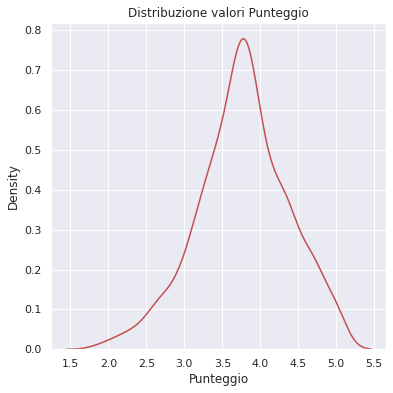

In [ ]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=data['Punteggio'], hist=False, color='r') #distplot è una delle funzioni disponibili su seaborn per plottare grafici.
p = plt.title('Distribuzione valori Punteggio')              #Si consiglia di leggere la documentazione per saper come modificarli a proprio piacimento.

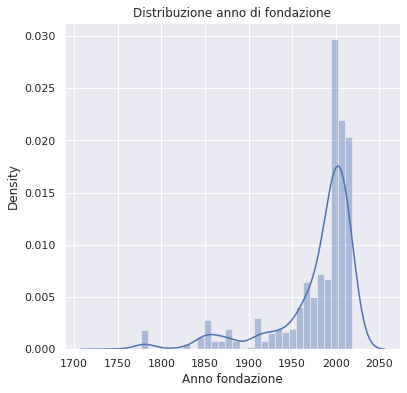

In [ ]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=data['Anno fondazione'])
p = plt.title('Distribuzione anno di fondazione')

I punteggio sono pressochè concentrati sul valore di 3.5-4.0.
L'anno di fondazione medio delle varie compagnie risulta essere avvenuto nel nuovo millennio.

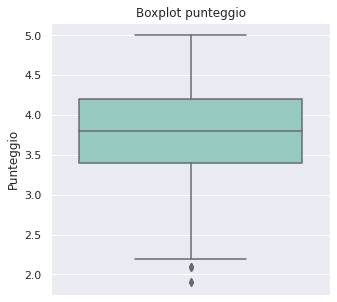

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Punteggio', data=data, orient='v', palette='Set3') #boxplot è un altro modo per plottare i dati. Anche qui si consiglia  
p = plt.title('Boxplot punteggio')                                #di leggere la documentazione.
p = plt.ylabel('Punteggio')

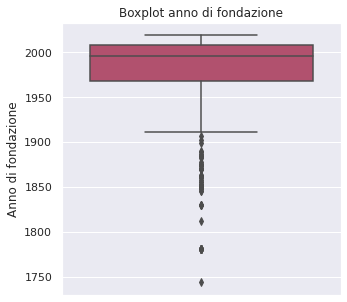

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Anno fondazione', data=data, orient='v', palette='flare')
p = plt.title('Boxplot anno di fondazione')
p = plt.ylabel('Anno di fondazione')

I boxplot confermano quanto detto in precedenza. Un'altra osservazione può essere fatta sull'anno di fondazione delle aziende. Abbiamo molte aziende nate intorno al 2000 ma allo stesso tempo abbiamo tanti valori outsiders.

**Passiamo ora alla pulizia della colonna 'Titolo lavorativo'**

In [ ]:
data['Titolo lavorativo'].value_counts().nlargest(20) #Contiamo quante volte viene ripetuto un titolo lavorativo(value_counts()).
                                                      #Elenchiamo i primi 20 con nlargest(20).

Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  4
Pharmaco

In [ ]:
def pulizia_titolo(titolo):
  if 'data scientist' in titolo.lower() or 'scientist' in titolo.lower():
    return 'data scientist'
  elif 'data engineer' in titolo.lower():
    return 'data engineer'
  elif 'data analyst' in titolo.lower():
    return 'data analyst'
  elif 'machine learning' in titolo.lower():
    return 'mle'
  elif 'manager' in titolo.lower():
    return 'manager'
  elif 'director' in titolo.lower():
    return 'director'
  else:
    return 'other'

#Abbiamo definito una piccola funzione che 'pulisce' i titoli lavorativi.
#La funzione lower() restituisce una stringa tutta in minuscolo.

data['Titolo lavorativo'] = data['Titolo lavorativo'].apply(pulizia_titolo)
data['Titolo lavorativo'].value_counts()

data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
director           13
mle                13
Name: Titolo lavorativo, dtype: int64

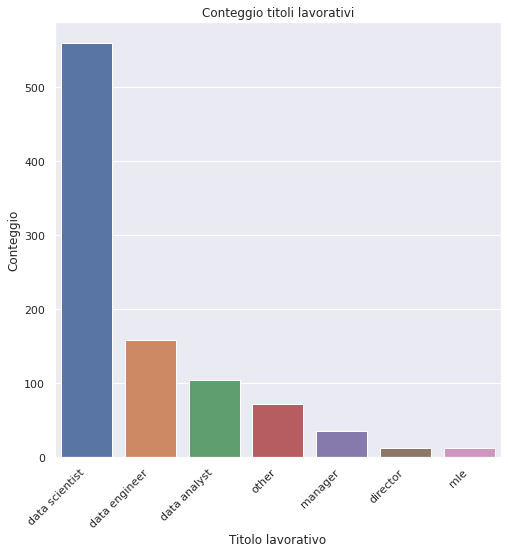

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot(x= 'Titolo lavorativo', data = data, order = data['Titolo lavorativo'].value_counts().index)
p = plt.title('Conteggio titoli lavorativi')
p = plt.xlabel('Titolo lavorativo')
p = plt.ylabel('Conteggio')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right') #set_xticklabels per ordinare meglio le etichette sotto le varie barre. 

Dal nostro data set i lavori più frequenti sono il data scientist, il data engineer ed il data analyst poi il resto dei lavori rispecchiano più una figura segnor o manageriale. 
La predizione quindi si adatta meglio per le prime 3 figure professionali.


**Pulizia colonna 'Salario stimato'**

In [ ]:
salario = data['Salario stimato'].apply(lambda x: x.split("(")[0]) #Usiamo split per eliminare la stringa (Glassdor est.).
salario.value_counts()

-1                  214
$86K-$143K            6
$54K-$115K            6
$49K-$113K            6
$21-$34 Per Hour      6
                   ... 
$74K-$119K            1
$55K-$97K             1
$15K-$16K             1
$61K-$106K            1
$62K-$113K            1
Name: Salario stimato, Length: 417, dtype: int64

In [ ]:
salario = salario.apply(lambda x: np.NaN if x == '-1' else x)
salario

Numero osservazione
0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salario stimato, Length: 956, dtype: object

In [ ]:
salario = salario.apply(lambda x: x if type(x) == type(3.5) else x.replace('$','').replace('K','')) #Con la funzione replace sostituiamo 
salario                                                                                             #i caratteri $ e K con degli spazi.

Numero osservazione
0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salario stimato, Length: 956, dtype: object

Analizzaimo ancora i salari e proviamo a pulire i dati anomali

In [ ]:
print("Salari: ",len(salario.unique()))
salario.unique()[380:] #unique trovare i valori unici nella colonna 'Salari'.


Salari:  417


array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

In [ ]:
salario = salario.apply(lambda x: x if type(x) == type(3.5) else x.lower().replace("employer provided salary:", ""))

def ore_per_anno(limite_min,limite_max):
  x = limite_min.strip() #strip() elimina i caratteri iniziali e finali
  y = limite_max.strip()
  x = int(int(limite_min)*40*50/1000) #convertiamo lo stipendio da orario ad annuale ipotizzando 40 ore settimanali lavorative e 50 settimane annuali.
  y = int(int(limite_max)*40*50/1000)
  return '{}-{}'.format(x,y)

In [ ]:
salario = salario.apply(lambda x: x if type(x) == type(3.5) else (ore_per_anno(x.lower().replace("per hour", "").split('-')[0], x.lower()
                        .replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))

data["Salario stimato"] = salario.apply(lambda x: x if type(x) == type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

salario

Numero osservazione
0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salario stimato, Length: 956, dtype: object

Assegnamo ai valori NaN la media della distribuzione degli stipendi


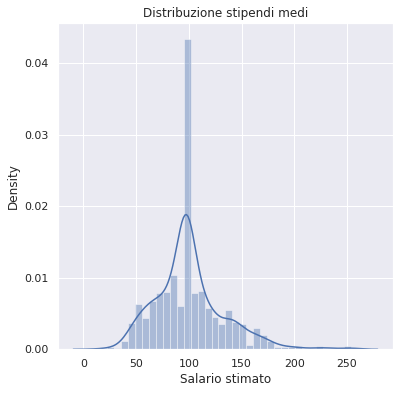

In [ ]:
data['Salario stimato'] = data['Salario stimato'].fillna(data['Salario stimato'].median())

plt.figure(figsize=(6,6))
g = sns.distplot(a = data['Salario stimato'])
p = plt.title('Distribuzione stipendi medi')

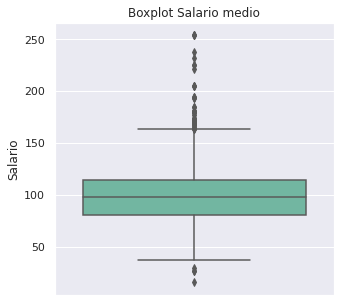

In [ ]:
plt.figure(figsize=(5,5))
g = sns.boxplot(y='Salario stimato', data=data, orient='v', palette='Set2')
p = plt.title('Boxplot Salario medio')
p = plt.ylabel('Salario')

Il salario medio stimato con i dati che abbiamo è di 100.000$.
Ci sono anche molti valori outsiders, probabilmente derivano dalle figure manageriali e junior.

**Pulizia colonna 'Compagnia'**

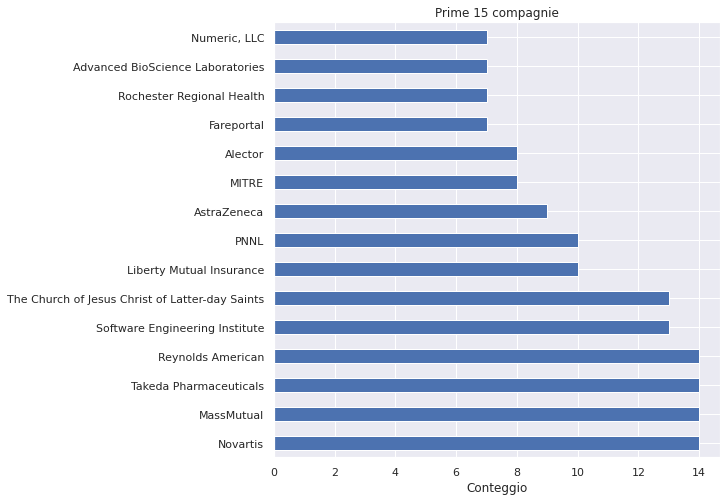

In [ ]:
data['Compagnia'] = data['Compagnia'].apply(lambda x: x.split("\n")[0])

plt.figure(figsize = (8,8))
g = data["Compagnia"].value_counts().nlargest(15).plot(kind = 'barh')
p = plt.title('Prime 15 compagnie')
p = plt.xlabel('Conteggio')

**Pulizia colonna 'Luogo'**

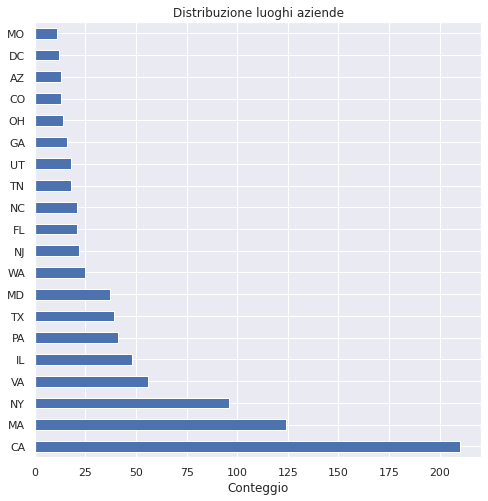

In [ ]:
data['Luogo'] = data['Luogo'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
plt.figure(figsize = (8,8))
g = data["Luogo"].value_counts().nlargest(20).plot(kind = 'barh')
p = plt.title('Distribuzione luoghi aziende')
p = plt.xlabel('Conteggio')

**Pulizia colonna 'Dimensioni'**

In [ ]:
data['Dimensioni'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Dimensioni, dtype: int64

In [ ]:
def converter(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

data['Dimensioni'] = data['Dimensioni'].apply(converter)

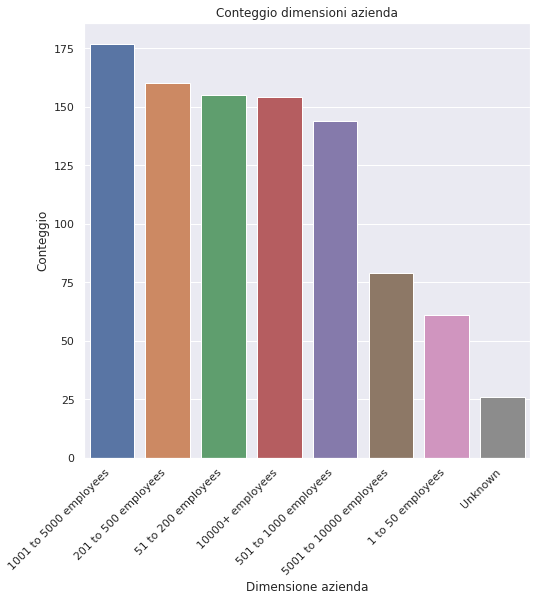

In [ ]:
plt.figure(figsize = (8,8))
g = sns.countplot(x='Dimensioni', data = data, order = data['Dimensioni'].value_counts().index)
p = plt.title('Conteggio dimensioni azienda')
p = plt.xlabel('Dimensione azienda')
p = plt.ylabel('Conteggio')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**Pulizia colonna 'Tipo di azienda'**

In [ ]:
data['Tipo di azienda'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Tipo di azienda, dtype: int64

Creiamo una funzione che raggruppi alcuni tipi di azienda

In [ ]:
def tipo_di_azienda(azienda):
  if 'private' in azienda.lower():
    return 'Private'
  elif 'public' in azienda.lower():
    return 'Public'
  elif ('-1' in azienda.lower()) or ('unknown' in azienda.lower()) or ('school / school district' in azienda.lower()) or ('private practice / film'
        in azienda.lower()) or ('contract' in azienda.lower()):
          return 'Other Organization'
  else:
    return azienda


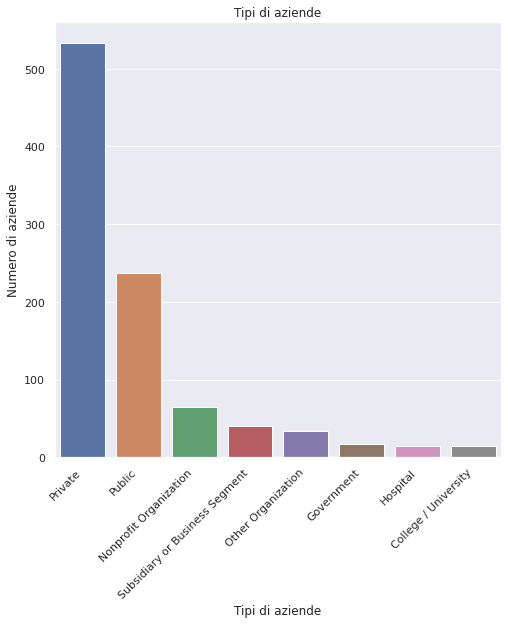

In [ ]:
data['Tipo di azienda'] = data['Tipo di azienda'].apply(tipo_di_azienda)

plt.figure(figsize=(8,8))
g = sns.countplot(x='Tipo di azienda', data = data, order = data['Tipo di azienda'].value_counts().index)
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
p = plt.title('Tipi di aziende')
p = plt.xlabel('Tipi di aziende')
p = plt.ylabel('Numero di aziende')

**Pulizia colonna 'Industria'**

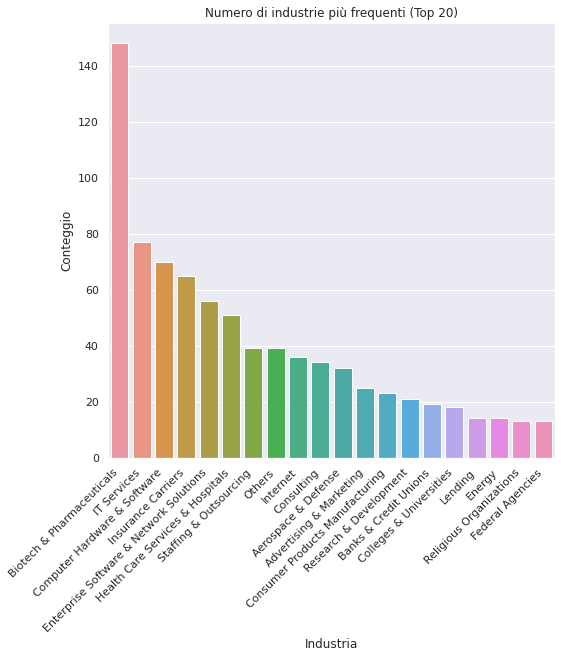

In [ ]:
data['Industria'] = data['Industria'].apply(lambda x: 'Others' if x == '-1' else x)

plt.figure(figsize=(8,8))
g = sns.countplot(x='Industria', data = data, order = data['Industria'].value_counts()[:20].index)
p = plt.title('Numero di industrie più frequenti (Top 20)')
p = plt.xlabel('Industria')
p = plt.ylabel('Conteggio')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**Pulizia colonna 'Settore'**

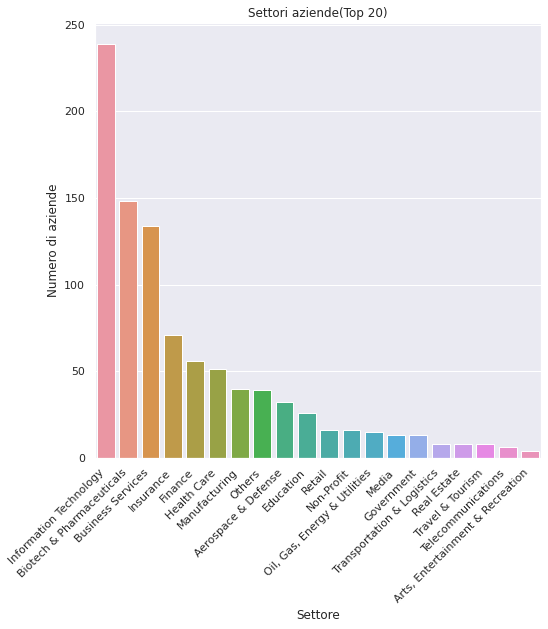

In [ ]:
data['Settore'] = data['Settore'].apply(lambda x: 'Others' if x=='-1' else x)

plt.figure(figsize=(8,8))
g = sns.countplot(x='Settore', data=data, order = data['Settore'].value_counts()[:20].index)
p = plt.title('Settori aziende(Top 20)')
p = plt.xlabel('Settore')
p = plt.ylabel('Numero di aziende')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**Pulizia colonna 'Fatturato'**

In [ ]:
def pulizia_fatturato(fatturato):
  if '-1' in fatturato.lower():
    return 'Unknown / Non-Applicable'
  else:
    return fatturato

data['Fatturato'] = data['Fatturato'].apply(pulizia_fatturato)

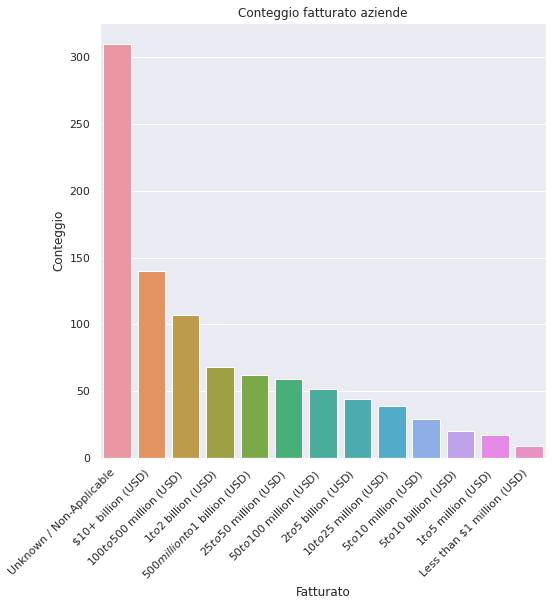

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Fatturato', data=data, order = data['Fatturato'].value_counts().index)
p = plt.title('Conteggio fatturato aziende')
p = plt.xlabel('Fatturato')
p = plt.ylabel('Conteggio')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**Pulizia colonna 'Concorrenti'**

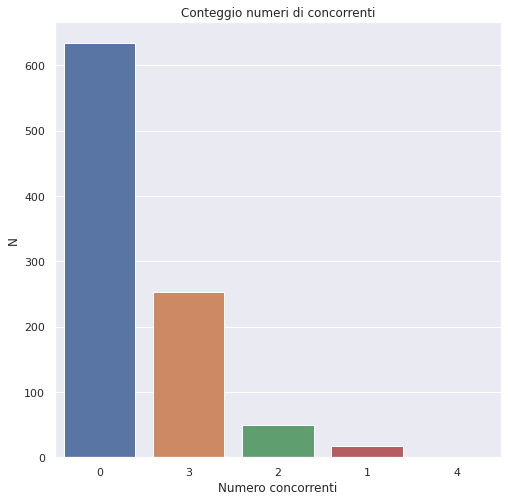

In [ ]:
data['Concorrenti'] = data['Concorrenti'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

plt.figure(figsize=(8,8))
g = sns.countplot(x='Concorrenti', data=data, order = data['Concorrenti'].value_counts().index)
p = plt.title('Conteggio numeri di concorrenti')
p = plt.xlabel("Numero concorrenti")
p = plt.ylabel('N')

***DATASET ATTUALE***

In [ ]:
data.tail()

,Titolo lavorativo,Salario stimato,Descrizione lavoro,Punteggio,Compagnia,Luogo,Sede,Dimensioni,Anno fondazione,Tipo di azienda,Industria,Settore,Fatturato,Concorrenti
Numero osservazione,,,,,,,,,,,,,,
951,data engineer,102.5,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,TN,"San Francisco, CA",1001 to 5000 employees,2006,Public,Internet,Information Technology,$100 to $500 million (USD),3
952,data scientist,73.5,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,PA,"Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0
953,manager,127.5,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC",PA,"Chadds Ford, PA",1 to 50 employees,1996,Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0
954,data engineer,97.5,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW,TX,"Portland, OR",201 to 500 employees,2015,Private,IT Services,Information Technology,$25 to $50 million (USD),1
955,data scientist,93.5,Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute,OH,"Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),0


Utilizziamo la funzione .to_csv e .download per convertire e scaricare il nostro dataset pulito.

In [ ]:
from google.colab import files
data.to_csv('data_clean.csv') 
files.download('data_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analisi dataset

**Cerchiamo e poi plottiamo l'eventuale correlazione tra i dati numerici**

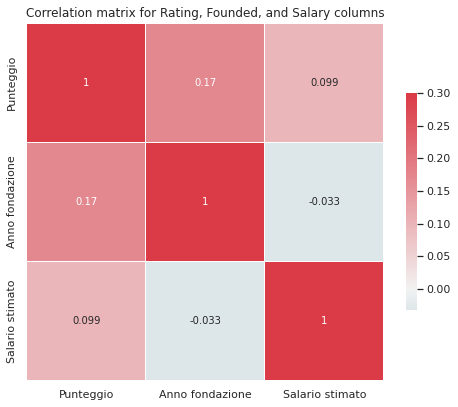

In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True) #diverging_palette crea una tavolozza divergente.
plt.figure(figsize=(8,8))
corr = data[['Punteggio','Anno fondazione','Salario stimato']].corr() #calcolo correlazione tra i 3 valori.

g = sns.heatmap(corr, vmax=0.3, center=0, cmap=cmap, square=True, annot=True, linewidths=0.05, cbar_kws={"shrink": .5}) #creo tramite heatmap una sfumatura di colori che varia in base al valore di correlazione.
p = plt.title('Correlation matrix for Rating, Founded, and Salary columns')

Notiamo come non siano minimamente correlati i valori del salario con l'anno di fondazione della società.
E' bassa anche la correlazione tra il punteggio e il salario minimo mentre il punteggio e l'anno di fondazione sono correlati.

Creiamo ora delle tabelle extra per sapere i linguaggi di programmazione conosciuti.

Se nella descrizione del lavoro c'è uno dei seguenti linguaggi allora assegnamo il valore 1 alla tabella corrispondente.

In [ ]:
data['python_job'] = data['Descrizione lavoro'].apply(lambda x: 1 if 'python' in x.lower() else 0)
data['excel_job'] = data['Descrizione lavoro'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
data['sql_job'] = data['Descrizione lavoro'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
data['tableau_job'] = data['Descrizione lavoro'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

Plottiamo più grafici per sapere quante persone conoscono un determinato linguaggio.

In [ ]:
'''
#Per python
plt.figure(figsize=(5,5))
g = sns.countplot(x='python_job', data=data)
p = plt.title('Conteggio numero di persone che conoscono Python')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')
#Per sql
plt.figure(figsize=(5,5))
g = sns.countplot(x='sql_job', data=data)
p = plt.title('Conteggio numero di persone che conoscono Sql')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')
#Per tableau
plt.figure(figsize=(5,5))
g = sns.countplot(x='tableau_job', data=data)
p = plt.title('Conteggio numero di persone che conoscono Tableau')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')
#Per excel
plt.figure(figsize=(5,5))
g = sns.countplot(x='excel_job', data=data)
p = plt.title('Conteggio numero di persone che conoscono Excel')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')
'''

'\n#Per python\nplt.figure(figsize=(5,5))\ng = sns.countplot(x=\'python_job\', data=data)\np = plt.title(\'Conteggio numero di persone che conoscono Python\')\np = plt.xlabel("1(Si) 0(No)")\np = plt.ylabel(\'N\')\n#Per sql\nplt.figure(figsize=(5,5))\ng = sns.countplot(x=\'sql_job\', data=data)\np = plt.title(\'Conteggio numero di persone che conoscono Sql\')\np = plt.xlabel("1(Si) 0(No)")\np = plt.ylabel(\'N\')\n#Per tableau\nplt.figure(figsize=(5,5))\ng = sns.countplot(x=\'tableau_job\', data=data)\np = plt.title(\'Conteggio numero di persone che conoscono Tableau\')\np = plt.xlabel("1(Si) 0(No)")\np = plt.ylabel(\'N\')\n#Per excel\nplt.figure(figsize=(5,5))\ng = sns.countplot(x=\'excel_job\', data=data)\np = plt.title(\'Conteggio numero di persone che conoscono Excel\')\np = plt.xlabel("1(Si) 0(No)")\np = plt.ylabel(\'N\')\n'

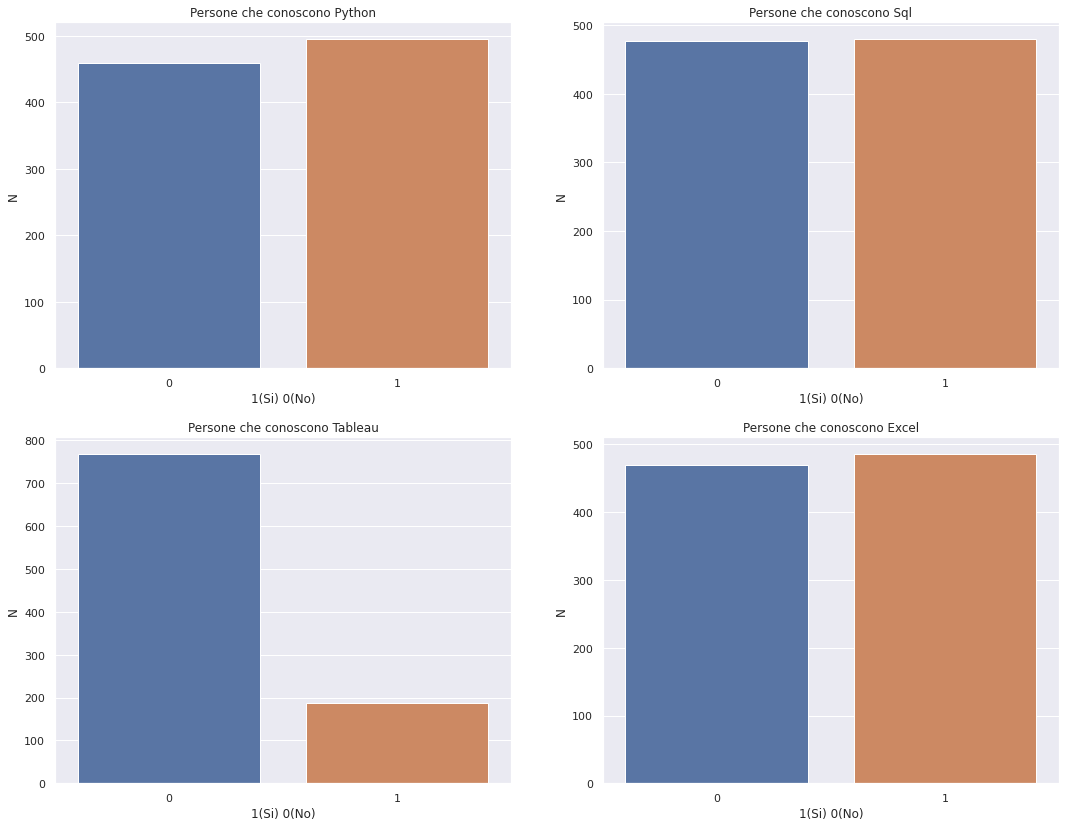

In [ ]:
sns.set(rc={"figure.figsize": (18, 14)}) #creo una tabella grande per poi inserirci le sotto tabelle

subplot(2,2,1)
g = sns.countplot(x='python_job', data=data)
p = plt.title('Persone che conoscono Python')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')

subplot(2,2,2)
g = sns.countplot(x='sql_job', data=data)
p = plt.title('Persone che conoscono Sql')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')

subplot(2,2,3)
g = sns.countplot(x='tableau_job', data=data)
p = plt.title('Persone che conoscono Tableau')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')

subplot(2,2,4)
g = sns.countplot(x='excel_job', data=data)
p = plt.title('Persone che conoscono Excel')
p = plt.xlabel("1(Si) 0(No)")
p = plt.ylabel('N')

plt.show()

Da come possiamo notare dai grafici i linguaggi maggiormente conosciuti sono python, sql ed excel. Mentre tableau non è un tool molto conosciuto.

Dopo aver estrapolato le informazioni dalla descrizione del lavoro possiamo anche eliminare la colonna.

In [ ]:
data.drop(labels=['Descrizione lavoro'], axis = 1, inplace=True)

Essendo un dataset con colonne con più di 10 o 20 valori decidiamo di ridurre la dimensionalità prendendo i valori più frequenti.

In [ ]:
settore = list(data['Settore'].value_counts()[:10].index)

def settore_rid(text):
  if text not in settore:
    return 'Others'
  else:
    return text

data['Settore'] = data['Settore'].apply(settore_rid)

In [ ]:
luogo_lavoro = list(data['Luogo'].value_counts()[:9].index)

def luogo_lavoro_rid(text):
  if text not in luogo_lavoro:
    return 'Others'
  else:
    return text

data['Luogo'] = data['Luogo'].apply(luogo_lavoro_rid)

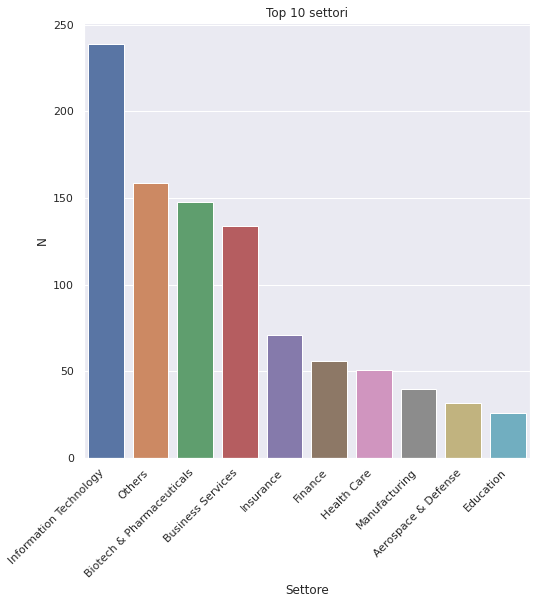

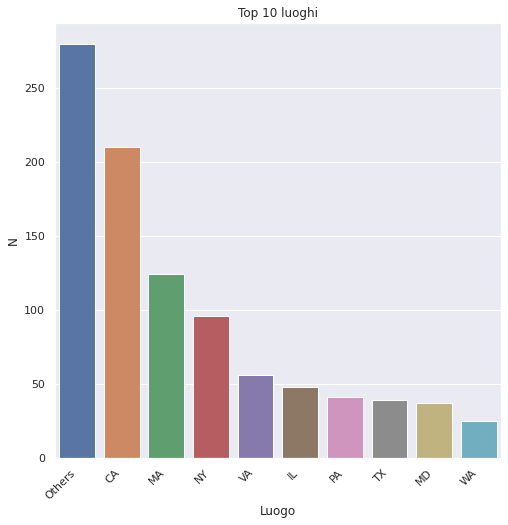

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Settore', data=data, order = data['Settore'].value_counts().index)
p = plt.title('Top 10 settori')
p = plt.xlabel('Settore')
p = plt.ylabel('N')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.figure(figsize=(8,8))
g = sns.countplot(x='Luogo', data=data, order = data['Luogo'].value_counts().index)
p = plt.title('Top 10 luoghi')
p = plt.xlabel('Luogo')
p = plt.ylabel('N')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

Eliminiamo altre colonne ormai non più necessarie

In [ ]:
data.drop(labels=['Compagnia', 'Sede', 'Industria'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['Titolo lavorativo', 'Salario stimato', 'Punteggio', 'Luogo',
       'Dimensioni', 'Anno fondazione', 'Tipo di azienda', 'Settore',
       'Fatturato', 'Concorrenti', 'python_job', 'excel_job', 'sql_job',
       'tableau_job'],
      dtype='object')

**Assegnamo ora un valore numerico per variabili come 'Dimensioni' e 'Fatturato'.**

In [ ]:
dim = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

data['Dimensioni'] = data['Dimensioni'].map(dim)

revenue_dim = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
           '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

data['Fatturato'] = data['Fatturato'].map(revenue_dim)

data.head()

,Titolo lavorativo,Salario stimato,Punteggio,Luogo,Dimensioni,Anno fondazione,Tipo di azienda,Settore,Fatturato,Concorrenti,python_job,excel_job,sql_job,tableau_job
Numero osservazione,,,,,,,,,,,,,,
0,data scientist,72.0,3.8,Others,4,1973,Private,Aerospace & Defense,6,0,1,1,0,1
1,data scientist,87.5,3.4,MD,7,1984,Other Organization,Health Care,10,0,1,0,0,0
2,data scientist,85.0,4.8,Others,4,2010,Private,Business Services,7,0,1,1,1,0
3,data scientist,76.5,3.8,WA,5,1965,Government,Others,8,3,1,0,0,0
4,data scientist,114.5,2.9,NY,2,1998,Private,Business Services,0,3,1,1,1,0


**Utilizziamo ora la funzione *get_dummies* per convertire variabili qualitative in variabili quantitative.**

In [ ]:
#Scindiamo la variabile 'Tipo di azienda'.
print('Prima: {}'.format(data.shape))
data = pd.get_dummies(columns=['Tipo di azienda'],data=data,prefix='Tipo di azienda')
print('Dopo: {}'.format(data.shape))

#Scindiamo anche la variabile 'Settore'.
print('Prima: {}'.format(data.shape))
data = pd.get_dummies(columns=['Settore'], data=data)
print('Dopo: {}'.format(data.shape))

#Scindiamo anche la variabile 'Titolo lavorativo'.
print('Prima: {}'.format(data.shape))
data = pd.get_dummies(columns=['Titolo lavorativo'], data=data)
print('Dopo: {}'.format(data.shape))

Prima: (956, 14)
Dopo: (956, 21)
Prima: (956, 21)
Dopo: (956, 30)
Prima: (956, 30)
Dopo: (956, 36)


**Avendo ora una dimensionalità del dataset elevata eliminiamo le variabili *others***.

In [ ]:
data.drop(labels=['Tipo di azienda_Other Organization','Settore_Others','Titolo lavorativo_other'], axis=1, inplace=True)
data.drop(labels=['Luogo'], axis=1, inplace=True)

**Selezioniamo le colonne con più informazioni reciproche tramite le funzioni *mutual_info_regression* e *SelectKBest***

In [ ]:
X = data.drop('Salario stimato', axis=1)
y = data['Salario stimato']

Dopo aver creato due 'dataframe' diversi mettiamo in relazione tutte le colonne con 'Salario stimato'. Fittiamo il risultato e i valori trovati gli inseriamo nel grafico sottostante.

In [ ]:
fs = SelectKBest(score_func=mutual_info_regression, k='all') 
fs.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7fe5488f2cb0>)

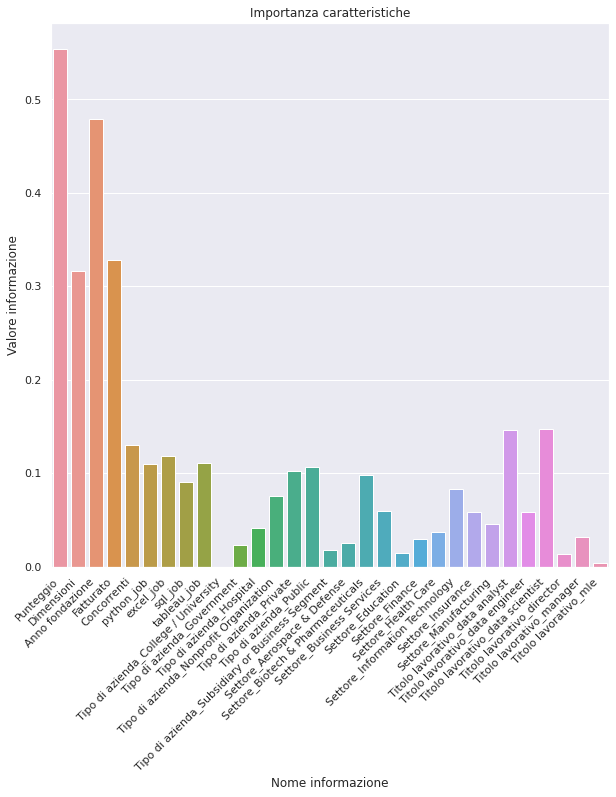

In [ ]:
plt.figure(figsize=(10,10))
g = sns.barplot(x=X.columns, y=fs.scores_)
p = plt.title('Importanza caratteristiche')
p = plt.xlabel('Nome informazione')
p = plt.ylabel('Valore informazione')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**Ovviamente ci sono n informazioni che impattano maggiormente sull'informazione target. Plottiamo in ordine le prime 20**.

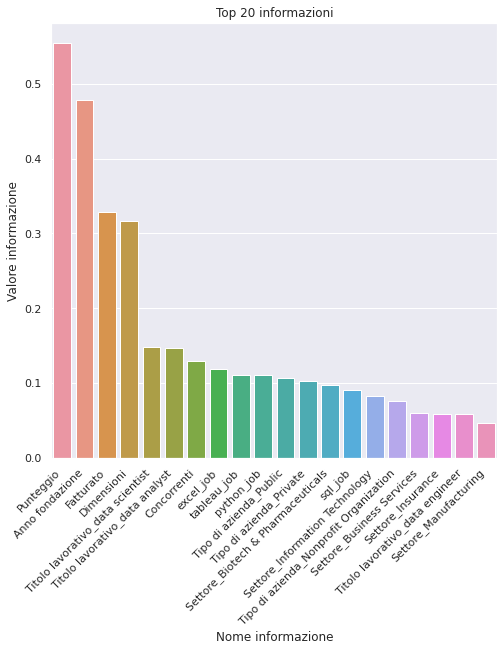

In [ ]:
info_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top20_info = info_imp.nlargest(n=20, columns=['Score'])

plt.figure(figsize=(8,8))
g = sns.barplot(x=top20_info.index, y=top20_info['Score'])
p = plt.title('Top 20 informazioni')
p = plt.xlabel('Nome informazione')
p = plt.ylabel('Valore informazione')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**Plottiamo la matrice di correlazione tra le 20 informazioni trovate.**

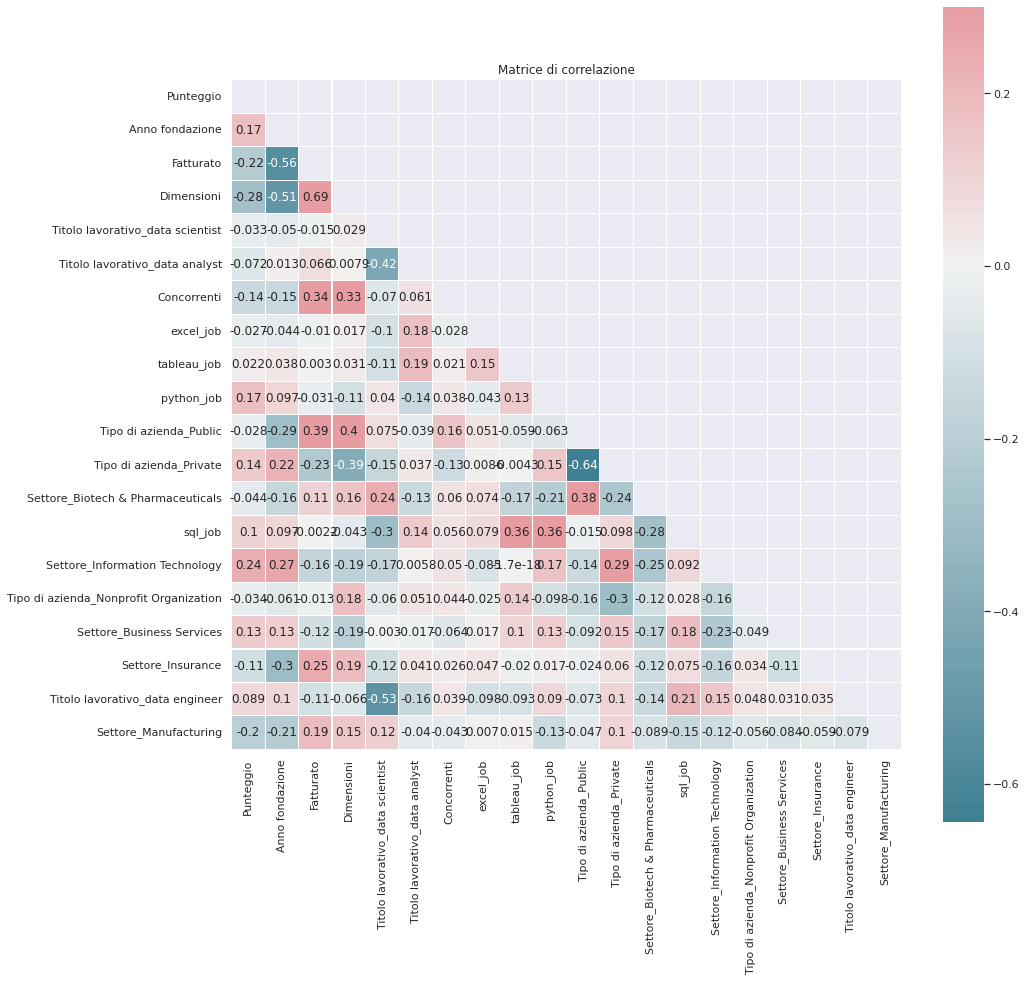

In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X[top20_info.index].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Matrice di correlazione')

Le analisi che si possono fare con questa matrice di correlazione sono davvero tante. Tra le principali troviamo una poca correlazione tra:

*   Tipo di azienda_Public e Tipo di azienda_Private
*   Titolo lavorativo_data engineer e Titolo lavorativo_data scientist
*   Anno di fondazione con Fatturato e Dimensioni

Mentre troviamo una forte correlazione in:
*   Sql
*   Fatturato
*   Settore_Information Technology




In [ ]:
X = X[top20_info.index]
X.drop(labels=['Tipo di azienda_Public', 'Titolo lavorativo_data engineer','Anno fondazione'], axis=1, inplace=True)

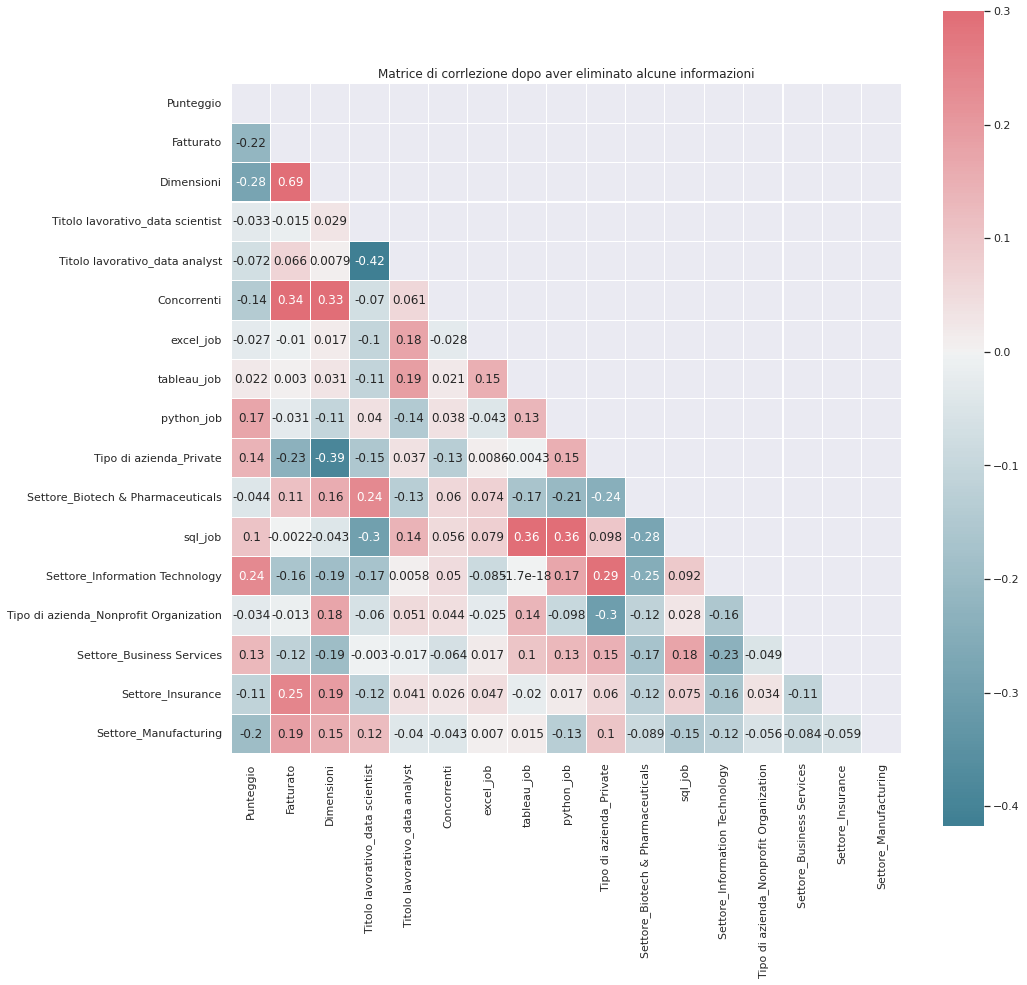

In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Matrice di corrlezione dopo aver eliminato alcune informazioni')

In [ ]:
X.columns


Index(['Punteggio', 'Fatturato', 'Dimensioni',
       'Titolo lavorativo_data scientist', 'Titolo lavorativo_data analyst',
       'Concorrenti', 'excel_job', 'tableau_job', 'python_job',
       'Tipo di azienda_Private', 'Settore_Biotech & Pharmaceuticals',
       'sql_job', 'Settore_Information Technology',
       'Tipo di azienda_Nonprofit Organization', 'Settore_Business Services',
       'Settore_Insurance', 'Settore_Manufacturing'],
      dtype='object')

In [ ]:
'''X = X[['Punteggio', 'Fatturato', 'Dimensioni',
       'Titolo lavorativo_data scientist', 'python_job',
       'Titolo lavorativo_data analyst', 'excel_job', 'Concorrenti',
       'Tipo di azienda_Private', 'tableau_job',
       'Settore_Biotech & Pharmaceuticals', 'sql_job',
       'Tipo di azienda_Nonprofit Organization', 'Settore_Health Care',
       'Settore_Business Services', 'Settore_Information Technology',
       'Settore_Manufacturing']]'''

**Utilizziamo la libreria *StandardScaler* per scalare i nostri valori**.

In [ ]:
X.head()

In [ ]:
X_prev = X.copy()

sc_punteggio = StandardScaler()
X['Punteggio'] = sc_punteggio.fit_transform(X[['Punteggio']])

sc_fatturato = StandardScaler()
X['Fatturato'] = sc_fatturato.fit_transform(X[['Fatturato']])

X.head()

In [ ]:
plt.figure(figsize=(8, 4))

#First plot
plt.subplot(1, 2, 1)
g = sns.distplot(a=X_prev['Punteggio'])
p = plt.title('Prima')

#Second plot
plt.subplot(1, 2, 2)
g = sns.distplot(a=X['Punteggio'])
p = plt.title('Dopo')

plt.tight_layout()
plt.show()

Scalare un set di dati non modifica la distribuzione.

# Costruzione e valutazione modello

**La metrica per valutare il miglior modello è: Negative Root Mean Squared Error (NRMSE). 
Quindi il miglior modello è quello che lo minimizza.**

In [ ]:
linear_regression = LinearRegression()
cv = cross_val_score(linear_regression, X, y, cv = 10, scoring ='neg_root_mean_squared_error') #utilizziamo la funzione cross validation con k=10.
print('--NRMSE media: {} ---'.format(round(cv.mean(),3))) #format sostituisce il valore che possiede al suo interno nelle parentesi graffe.
print('Deviazione standard: {}'.format(round(cv.std(),3))) #round arrotonda una cifra con n numeri decimali, 3 nel nostro caso.

--NRMSE media: -28.967 ---
Deviazione standard: 1.416


In [ ]:
lasso = Lasso()
cv = cross_val_score(lasso, X, y, cv = 10, scoring ='neg_root_mean_squared_error')
print('--NRMSE media: {} ---'.format(round(cv.mean(),3)))
print('Deviazione standard: {}'.format(round(cv.std(),3)))

--NRMSE media: -29.699 ---
Deviazione standard: 1.487


In [ ]:
rf = RandomForestRegressor()
cv = cross_val_score(rf, X, y, cv = 10, scoring ='neg_root_mean_squared_error')
print('--NRMSE media: {} ---'.format(round(cv.mean(),3)))
print('Deviazione standard: {}'.format(round(cv.std(),3)))

--NRMSE media: -19.793 ---
Deviazione standard: 5.31


In [ ]:
gbr = GradientBoostingRegressor()
cv = cross_val_score(gbr, X, y, cv = 10, scoring ='neg_root_mean_squared_error')
print('--NRMSE media: {} ---'.format(round(cv.mean(),3)))
print('Deviazione standard: {}'.format(round(cv.std(),3)))

--NRMSE media: -26.302 ---
Deviazione standard: 1.802


In [ ]:
vr = VotingRegressor([('random_forest', rf), ('gradient_boosting', gbr)], weights=[2,1])
cv = cross_val_score(vr, X, y, cv = 10, scoring ='neg_root_mean_squared_error')
print('--NRMSE media: {} ---'.format(round(cv.mean(),3)))
print('Deviazione standard: {}'.format(round(cv.std(),3)))

--NRMSE media: -21.079 ---
Deviazione standard: 3.931


**Tra i vari modelli scegliamo la random forest con un NRMSE = -19.872, cioè il più vicino a zero.**

# Predizione

**Creiamo ora una funzione che prova a predirre il salario di una figura professionale come il data scientist. Dopo aver inserito le caratteristiche del data scientist la nostra random forest proverà a darci una stima.**

In [ ]:
rf = RandomForestRegressor()
X.drop(labels=['Dimensioni', 'Fatturato','Tipo di azienda_Nonprofit Organization','Settore_Manufacturing','Tipo di azienda_Private'], axis=1, inplace=True)
X.columns

Index(['Punteggio', 'Titolo lavorativo_data scientist',
       'Titolo lavorativo_data analyst', 'Concorrenti', 'excel_job',
       'tableau_job', 'python_job', 'Settore_Biotech & Pharmaceuticals',
       'sql_job', 'Settore_Information Technology',
       'Settore_Business Services', 'Settore_Insurance'],
      dtype='object')

In [ ]:
rf.fit(X, y)

RandomForestRegressor()

In [ ]:
def predizione_salario(score, competitor, sector, ownership, titolo_lavorativo, job_skills):

    prediction_input = list()

    prediction_input.append(sc_punteggio.transform(np.array(score).reshape(1,-1)))
    prediction_input.append(competitor)

    sector_columns = ['Settore_Biotech & Pharmaceuticals','Settore_Information Technology'
                      'Settore_Business Services','Settore_Health Care']

    temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
    for index in range(0, len(sector_columns)):
      if sector_columns[index] == 'Settore_' + sector:
        temp[index] = 1
        break
    prediction_input = prediction_input + temp


    if ownership == ['Tipo di azienda_Private']:
      prediction_input.append(1)
    else:
      prediction_input.append(0)


    job_title_columns = ['Titolo lavorativo_data scientist', 'Titolo lavorativo_data analyst']
    temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
    for index in range(0, len(job_title_columns)):
        if job_title_columns[index] == 'Titolo lavorativo_' + titolo_lavorativo:
          temp[index] = 1
          break
    prediction_input = prediction_input + temp


    temp = list(map(int, np.zeros(shape=(1, 4))[0]))
    if 'excel' in job_skills:
      temp[0] = 1
    if 'python' in job_skills:
      temp[1] = 1
    if 'tableau' in job_skills:
      temp[2] = 1
    if 'sql' in job_skills:
      temp[3] = 1
    prediction_input = prediction_input + temp

    return rf.predict([prediction_input])[0]


**Proviamo a fare qualche predizione ora.**

Primo caso.

In [ ]:
salario1 = predizione_salario(4.5,2,'Settore_Information Technology','Private','data scientist',['python','excel','tableau','sql'])

In [ ]:
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salario1*1000)-9000, int(salario1*1000)+9000))

Estimated salary (range): 102470(USD) to 120470(USD) per annum.


Secondo caso.

In [ ]:
salario2 = predizione_salario(3.5,4,'Settore_Business Services','Private','data analyst',['python','sql'])

In [ ]:
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salario2*1000)-9000, int(salario2*1000)+9000))

Estimated salary (range): 96848(USD) to 114848(USD) per annum.


# Conclusioni

Il nostro algoritmo è riuscito a darci una stima del salario per due figure professionali come il data analyst e scientist.

Siamo arrivati a predirre il risultato dopo vari step, uno ugualmente importante all'altro.


Nella fase di ***Pulizia dati*** abbiamo fatto analisi più approfondite sui dati a disposizione dove il lavoro principale era di trovare valori anomali come -1 e sostituirlo con un dato numerico (la maggior parte delle volte lo si faceva sostituendoli con la media o mediana) mentre per dati qualitativi si è scelto di categorizzare i valori anomali con *Others*.
Durante la pulizia inoltre si è inoltre plottato qualche grafico per capire l'andamento dei dati come per esempio capire quali valori sono più frequenti di altri.


Nella fase di ***Analisi dataset*** si è utilizzato molto la funzione di correlazione per capire quali variabili erano più statisticamente collegate alle altre e quali magari lo erano meno. In questa parte si è scelto di utilizzare la correlazione come supporto a supposizioni effettuate in precedenza, ovviamente si possono utilizzare altre metriche che è anche la scelta più corretta da fare per poter ottenere più feadback possibili.
Inoltre si è utilizzato la colonna *Descrizione lavoro* per estrapolare le hard skills possedute dai dipendenti come sql e python.


Nella fase di ***Costruzione e valutazione modello*** abbiamo scelto NRMSE come metrica di errore, si consiglia di provare ad utilizzarne altri come MAE(Mean Absolute Error) e RMSE(Root Mean Squared Error). 
Scegliendo NRMSE come valutazione abbiamo trovato che *Random Forset* era il modello di ML che lo minimizzava rispetto agli altri.


Nella fase di ***Predizione*** infine non abbiamo fatto altro che utilizzare la funzione costruita nella sezione precedente per provare a predirre i risultati che sono i seguenti:

**CASO 1**:

* Punteggio azienda = 4.5
* Competitori aziendali = 2
* Settore azienda = Information Technology
* Tipo di azienda = Privata
* Titolo lavorativo = Data scientist
* Hard skills possedute = Python, Excel, Tableau, Sql

***Salario stimato: 102470(USD) to 120470(USD) per annum.***

**CASO 2**:

* Punteggio azienda = 3.5
* Competitori aziendali = 4
* Settore azienda = Business Services
* Tipo di azienda = Privata
* Titolo lavorativo = Data analyst
* Hard skills possedute = Python, Sql

***Salario stimato: 96848(USD) to 114848(USD) per annum.***



